# Data Analysis: GAN-Hyperparameter 

## Load modules

In [1]:
import tensorboard as tb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load experiments

In [2]:
experiment_v08_1 = pd.read_json("models/logs/Tensorboard/experiment_wrI0ZoL2TWWF2EZtnXj2lA/scalars.json", lines=True)
experiment_v08_2 = pd.read_json("models/logs/Tensorboard/experiment_ZPhx5ngMTz2gFXaml1QibA/scalars.json", lines=True)

experiment_v08 = pd.concat([experiment_v08_1, experiment_v08_2], ignore_index=True)

losses = ['disc_loss', 'gen_gan_loss', 'gen_l1_loss', 'gen_total_loss']


### Global plot settings

In [3]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [8, 5.5]
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['savefig.dpi'] = 'figure'

plot_losses = [losses[0], losses[3]]
linestyles = ["-", "--", ":"]

save_plots = True


## Analysis

In [4]:
def split_df(dataframe):
    
    df = dataframe.copy()
    df = df.drop(columns="summary_metadata")
    keys = ['version', 'alpha', 'beta', 'discrep', 'iterations', 'batchsize', 'learning_rate', 'N_telescopes', 'model_layout']

    
    versions = []
    alphas = []
    betas = []
    discreps = []
    iterationss = []
    batchsizes = []
    learning_rates = []
    N_telescopess = []
    model_layouts = []

    steps = []
    scalars = []
    
    values = [versions, alphas, betas, discreps, iterationss, batchsizes, learning_rates, N_telescopess, model_layouts]
    
    
    # Loop over the whole dataset, and fill lists based on 'run' variable > Unpack parameters
    
    for row in df.iloc:
        for num, value in enumerate(values):
            value.append(row.run.split('_')[:][num+1])
        steps.append(row.points['steps'])
        scalars.append(row.points['values'])

        

    
    # Loop over whole dataset again, and fill new columns > also steps and values
    for value, key in zip(values, keys):
        df[key] = value
        df['steps'] = steps
        df['scalars'] = scalars

    df = df.drop(columns="points")

    return df



In [5]:
df_v08 = split_df(experiment_v08)

### Learning rate > run 7 and 8 and run 5

/tmp/ipykernel_1740493/275863045.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


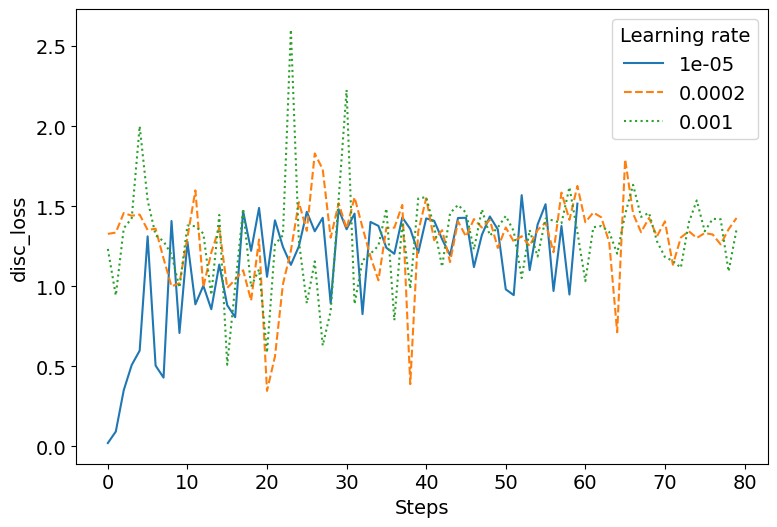

/tmp/ipykernel_1740493/275863045.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


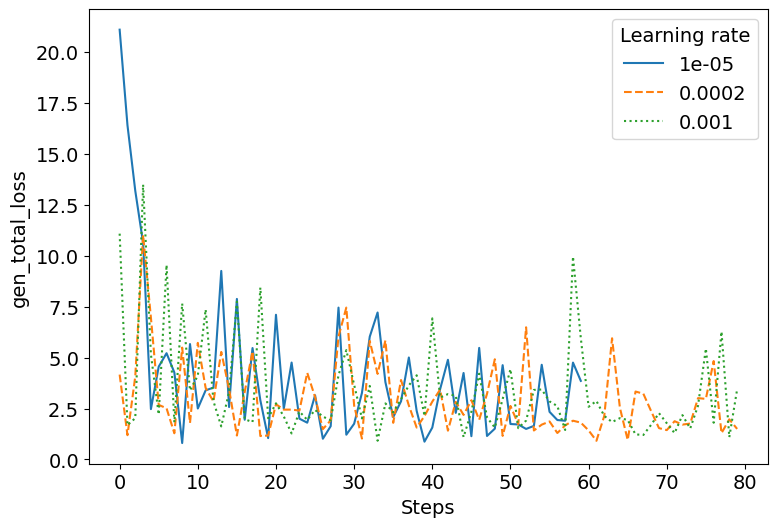

In [6]:
# Plot of the effect of different learning rates

plot_runs = ['run8.5', 'run8.7', 'run8.8']
labels = [1e-5, 2e-4, 1e-3]

for loss in plot_losses:
    i = 0
    for run in plot_runs:
        plt.plot((df_v08[(df_v08.tag == loss) & (df_v08.version == run)].steps).to_numpy()[0], 
                (df_v08[(df_v08.tag == loss) & (df_v08.version == run)].scalars).to_numpy()[0],
                 label= labels[i], linestyle=linestyles[i])
        plt.xlabel("Steps")
        plt.ylabel(loss)
        plt.tight_layout()
        plt.legend(title="Learning rate")
        i += 1
    if save_plots:
        plt.savefig(f"Data/Plots/Report/Plot_learning_rate_{loss}")
    plt.show()
    plt.close()




### Noise: $\frac{\alpha}{\beta}$ > run 11, 12 13 (64px!)

# Plot of the effect of different batch sizes

plot_runs = ['run7.11', 'run7.12', 'run7.13']
ratios = [1, 0.05, 50]
plot_losses = [losses[0], losses[3]]

for loss in plot_losses:
    i = 0
    for run in plot_runs:
        plt.plot((df_v08[(df_v08.tag == loss) & (df_v08.version == run)].steps).to_numpy()[0], 
                (df_v08[(df_v08.tag == loss) & (df_v08.version == run)].scalars).to_numpy()[0],
                 label= labels[i])
        plt.xlabel("Steps")
        plt.ylabel(loss)
        plt.legend(title=' alpha / beta')
        i += 1
    if save_plots:
        plt.savefig(f"Data/Plots/Report/Plot_noise_factor_{loss}")
    plt.show()
    plt.close()




### Disc repetitions > run 2,3,4 NEW

/tmp/ipykernel_1740493/3432847165.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


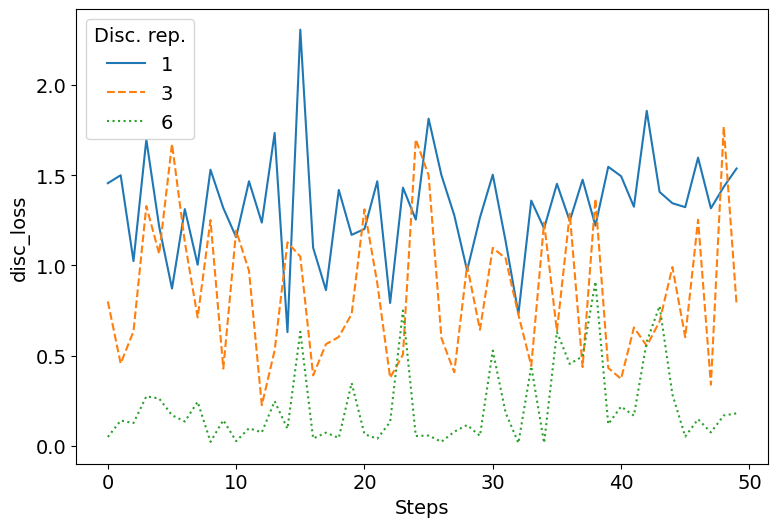

/tmp/ipykernel_1740493/3432847165.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


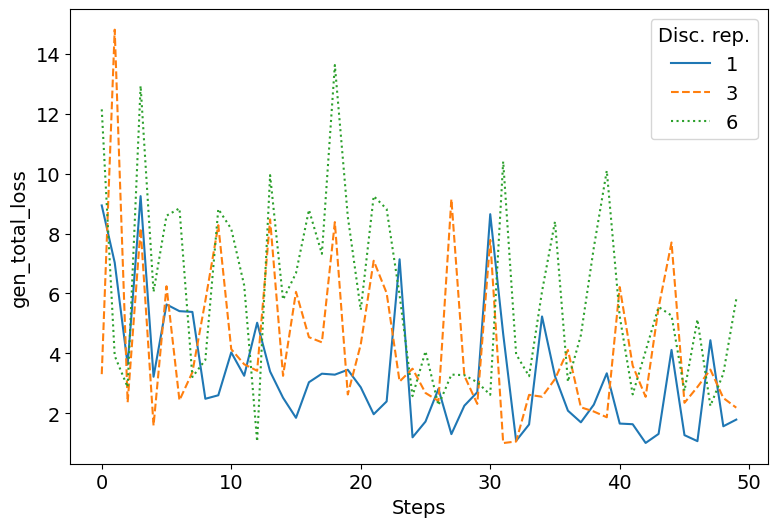

In [7]:
# Plot of the effect of different batch sizes

plot_runs = ['run8.13', 'run8.19', 'run8.20']
labels = [1, 3, 6, 8]

for loss in plot_losses:
    i = 0
    for run in plot_runs:
        plt.plot((df_v08[(df_v08.tag == loss) & (df_v08.version == run)].steps).to_numpy()[0][:50], 
                (df_v08[(df_v08.tag == loss) & (df_v08.version == run)].scalars).to_numpy()[0][:50],
                 label= labels[i], linestyle=linestyles[i])
        plt.xlabel("Steps")
        plt.ylabel(loss)
        plt.tight_layout()
        plt.legend(title='Disc. rep.')
        i += 1
    if save_plots:
        plt.savefig(f"Data/Plots/Report/Plot_Disc_rep_{loss}")
    plt.show()
    plt.close()



### Batch size > run 7, 8, 9 NEW

/tmp/ipykernel_1740493/3820269086.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


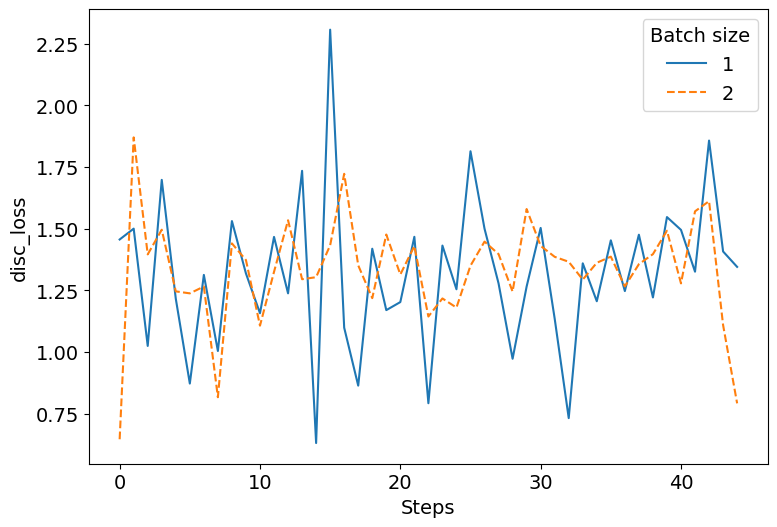

/tmp/ipykernel_1740493/3820269086.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


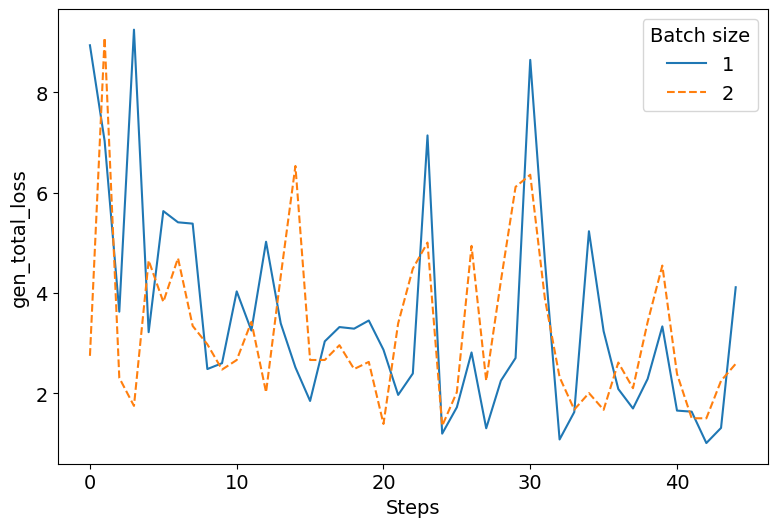

In [8]:
# Plot of the effect of different batch sizes

plot_runs = ['run8.13', 'run8.16']
labels = [1, 2]

for loss in plot_losses:
    i = 0
    for run in plot_runs:
        plt.plot((df_v08[(df_v08.tag == loss) & (df_v08.version == run)].steps).to_numpy()[0][:45], 
                (df_v08[(df_v08.tag == loss) & (df_v08.version == run)].scalars).to_numpy()[0][:45],
                 label= labels[i], linestyle=linestyles[i])
        plt.xlabel("Steps")
        plt.ylabel(loss)
        plt.tight_layout()
        plt.legend(title='Batch size')
        i += 1
    if save_plots:
        plt.savefig(f"Data/Plots/Report/Plot_Batchsize_{loss}")
    plt.show()
    plt.close()



### Kernel size > run 7, 9, 13

/tmp/ipykernel_1740493/881438134.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


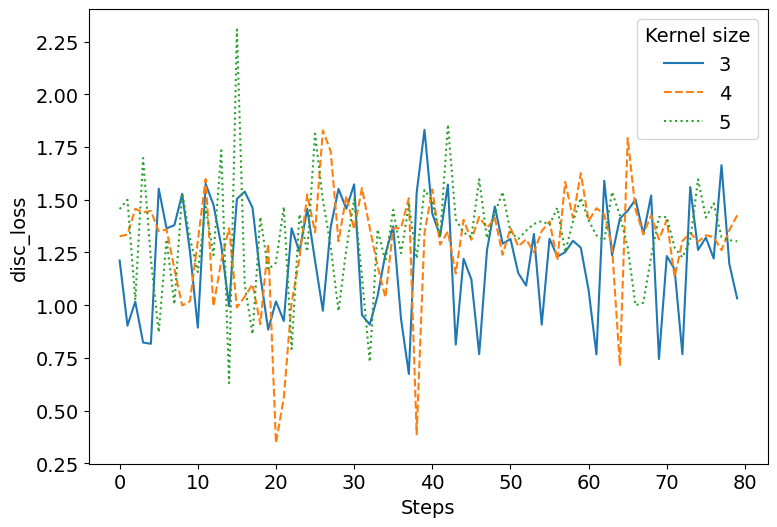

/tmp/ipykernel_1740493/881438134.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


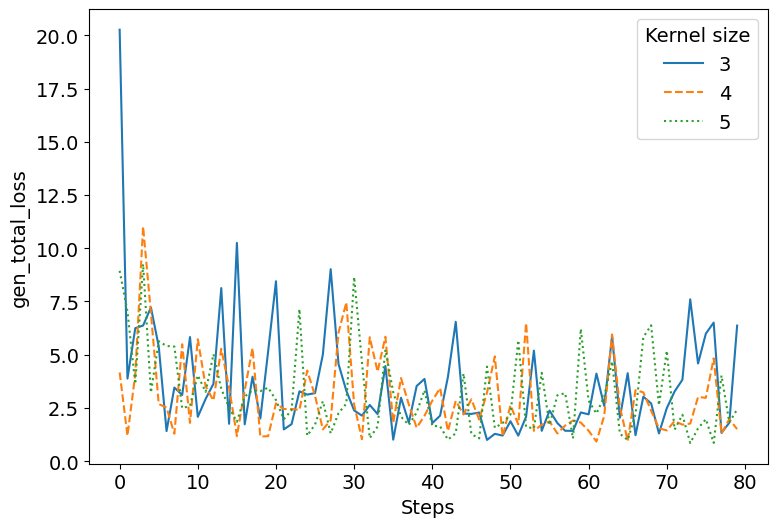

In [9]:
# Plot of the effect of different batch sizes

plot_runs = ['run8.9', 'run8.7', 'run8.13']
labels = [3, 4, 5]

for loss in plot_losses:
    i = 0
    for run in plot_runs:
        plt.plot((df_v08[(df_v08.tag == loss) & (df_v08.version == run)].steps).to_numpy()[0], 
                (df_v08[(df_v08.tag == loss) & (df_v08.version == run)].scalars).to_numpy()[0],
                 label= labels[i], linestyle=linestyles[i])
        plt.xlabel("Steps")
        plt.ylabel(loss)
        plt.legend(title='Kernel size')
        plt.tight_layout()
        i += 1
    if save_plots:
        plt.savefig(f"Data/Plots/Report/Plot_Kernel_size_{loss}")
    plt.show()
    plt.close()



### Number of telescopes > run 10, 11, 12

/tmp/ipykernel_1740493/3526929096.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


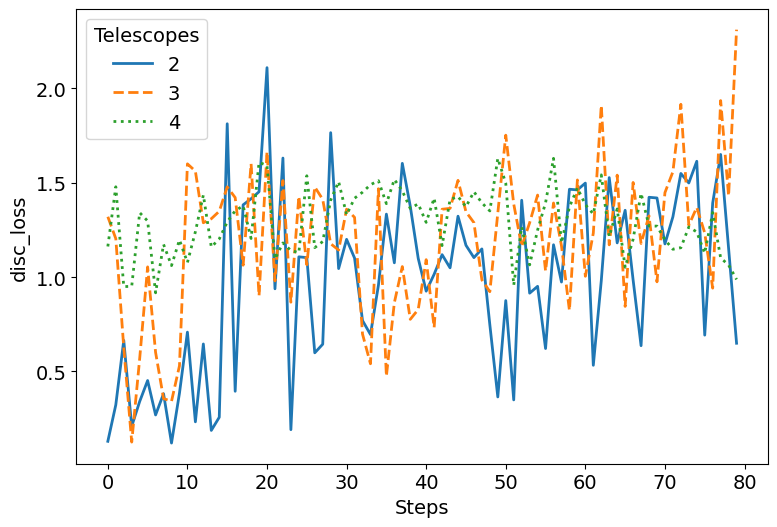

/tmp/ipykernel_1740493/3526929096.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


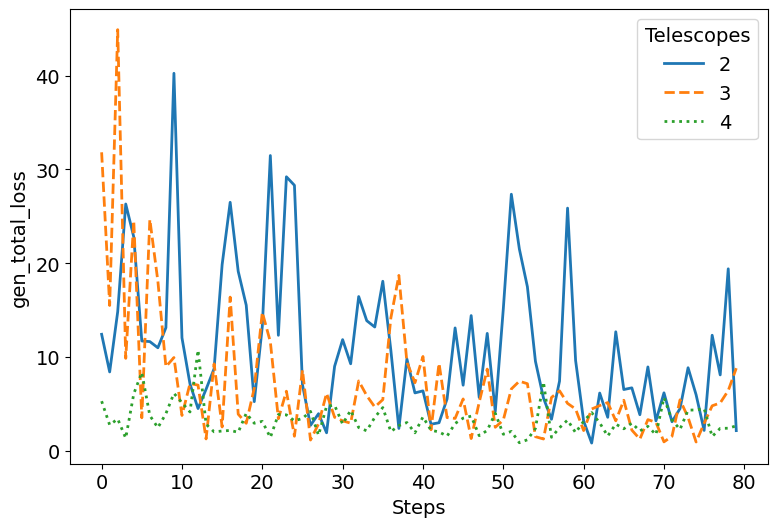

In [10]:
# Plot of the effect of different telescopes

plot_runs = ['run8.10', 'run8.11', 'run8.12']
labels = [2, 3, 4]


for loss in plot_losses:
    i = 0
    for run in plot_runs:
        plt.plot((df_v08[(df_v08.tag == loss) & (df_v08.version == run)].steps).to_numpy()[0], 
                (df_v08[(df_v08.tag == loss) & (df_v08.version == run)].scalars).to_numpy()[0],
                 label= labels[i], linewidth=2, linestyle=linestyles[i])
        plt.xlabel("Steps")
        plt.ylabel(loss)
        plt.tight_layout()
        plt.legend(title='Telescopes')
        i += 1
    if save_plots:
        plt.savefig(f"Data/Plots/Report/Plot_N_telescopes_{loss}")
    plt.show()
    plt.close()

